In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.widgets import Button
import pandas as pd
import numpy as np
from geopy import distance


# Get lat/long for the edges of your image.

In [3]:
NE=(-106.33,33.8844)
SE=(-106.33,33.4802)
SW=(-106.7915,33.4746)
NW=(-106.800,33.8796)

# Read in the image.

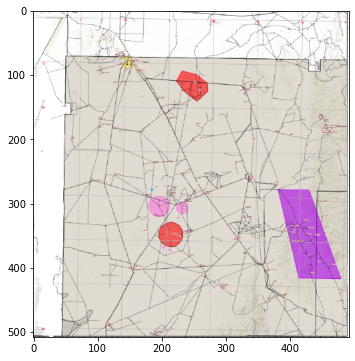

In [5]:
fig=plt.figure(figsize=(8,6))
axes=fig.add_subplot(1,1,1,aspect='equal')
img=plt.imread(r'C:\Users\MCOTEA_User_006\Documents\GPS\WSMR.png')
axes.imshow(img)

# Define transformation between python ang graph and the lat/longs on the image map. This allows you to plot lat/longs and have them appear in the correct position overlayed on the map. Here I plotted three green dots.

test: on -106.600, 33.817 we get [9.034127843988244, 115.3179848320724, 203.5335861321946] [42.60126891165419, 63.65422157149442, 83.46876525133848]


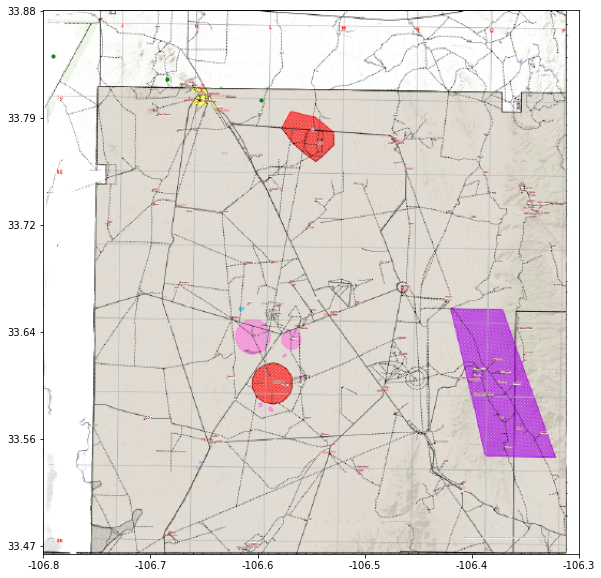

In [49]:
fig=plt.figure(figsize=(10,10))
axes=fig.add_subplot(1,1,1,aspect='equal')
img=plt.imread(r'C:\Users\MCOTEA_User_006\Documents\GPS\WSMR.png')
axes.imshow(img)

xmax=axes.get_xlim()[1]
ymin=axes.get_ylim()[0]


def coordinatesOnFigure(long=[],lat=[],SW=SW,NE=NE,xmax=xmax,ymin=ymin):
    Long_Coordinates=[]
    Lat_Coordinates=[]
    px=xmax/(NE[0]-SW[0])
    qx=-SW[0]*xmax/(NE[0]-SW[0])
    py=-ymin/(NE[1]-SW[1])
    qy=NE[1]*ymin/(NE[1]-SW[1])
    for i, j in zip(long,lat):
        Long_Coordinates.append(px*i+qx)
        Lat_Coordinates.append(py*j+qy)
    return Long_Coordinates, Lat_Coordinates

long=[-106.783,-106.683,-106.600]
lat=[33.850,33.833,33.817]
x,y = coordinatesOnFigure(long,lat)
print("test: on -106.600, 33.817 we get", x,y)
axes.scatter(x,y,s=10,c='green', alpha=.9)
x_positions=[0,100,200,300,400,500]
xlabels=[-106.800,-106.700,-106.600,-106.500,-106.400,-106.300]
plt.xticks(positions,xlabels)
y_positions=[500,400,300,200,100,0]
y_labels=[33.47,33.56,33.64,33.72,33.79,33.88]
plt.yticks(y_positions,y_labels)



plt.show()


# The below code reads in a dataframe with lat/long truth and source values. It then computes the distance between them and records the output in a column called "Deviation". It is using GeoPy's Distnace method which i sent info on in an earlier email. I also play around with the GeoCoder module for fun.

In [111]:
distance.distance(point1,point2).m

9295.458062258127

In [83]:
df=pd.read_csv(r'C:\Users\MCOTEA_User_006\Documents\GPS\Sample2.csv')

In [84]:
df.columns

Index(['JD', 'JD_from_TFOM', 'TrialNumber', 'Vehicle', 'Manufacturer', 'SN',
       'GPSTimeFull8504', 'UTC Time Tag', 'UTCSec_UHARS', 'TimeDiff',
       'DateTime_from_TFOM', 'ETE', 'TFOM', 'MGRS', 'Lat-deg-rcvr',
       'Long-deg-rcvr', 'Lat_Deg_UHARS', 'Long_Deg_UHARS', 'Hor_accuracy_m',
       'FOM', 'AltAbs', 'Alt_HAE_UHARS', 'Vert_accuracy_m', 'Ground Speed',
       'Track', 'VelEast', 'VelNorth', 'VelUp', 'vNorth_UHARS', 'vEast_UHARS',
       'vDown_UHARS', 'VelE_dev', 'VelN_dev', 'VelU_dev', 'PassFail-HorAcc',
       'PassFail-VertAcc', 'PassFail-Vel', 'PVT_Data_Not_Valid',
       'PVT Solution Assurance', 'Nav Converged', 'Invalid Signals 8080',
       'Invalid Y-Code 8080', 'Invalid M-Code 8080',
       'PVT Unavailable due to Jam 8080',
       'PVT Solution Assurance Unavail 8080', 'SpecA_Value',
       'SpecA_Value_Mov_Avg', 'RCVR Operation', 'RCVR Failure', 'SVinSoln',
       'RFJammers', 'Counter8504', 'Counter8080', 'Counter5040'],
      dtype='object')

In [95]:
df['Lat_Deg_Rcvr']=df['Lat-deg-rcvr']
df['Long_Deg_Rcvr']=df['Long-deg-rcvr']

In [107]:
df['Deviation']=df.apply((lambda x: distance.distance((x['Lat_Deg_Rcvr'],x['Long_Deg_Rcvr']),(x['Lat_Deg_UHARS'],x['Long_Deg_UHARS'])).m),axis=1)

In [108]:
df[['Lat_Deg_Rcvr','Long_Deg_Rcvr','Lat_Deg_UHARS','Long_Deg_UHARS','Deviation']]

,Lat_Deg_Rcvr,Long_Deg_Rcvr,Lat_Deg_UHARS,Long_Deg_UHARS,Deviation
0,33.819502,-106.653075,33.821518,-106.657835,494.226943
1,33.819502,-106.653075,33.821518,-106.657835,494.228449
2,33.819502,-106.653075,33.821517,-106.657836,494.265116
3,33.819502,-106.653075,33.821513,-106.657837,494.088849
4,33.819502,-106.653075,33.821512,-106.657836,493.949663
...,...,...,...,...,...
2944,33.817110,-106.651862,33.822960,-106.654727,700.907522
2945,33.817112,-106.651862,33.822960,-106.654727,700.775320
2946,33.817111,-106.651862,33.822960,-106.654727,700.841876
2947,33.817100,-106.651866,33.822950,-106.654728,700.823828


In [117]:
from geopy.geocoders import Nominatim
geolocator=Nominatim(user_agent='specify')
location=geolocator.geocode('2032 Barnett Avenue Quantico')
location

Location(Barnett Avenue, Quantico, Prince William County, Virginia, 22134, United States, (38.5199386, -77.2971866, 0.0))